# 1. Data Preprocessing

### Importing the Library

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Importing the Dataset

In [2]:
dataset = pd.read_csv('bigmart.csv')
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# datatype of attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# replace reapted values in Item_Fat_Content
dataset['Item_Fat_Content'] = dataset.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat', 'Regular'])
dataset.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [6]:
# removing the ineffective columns
dataset = dataset.drop(columns = ['Item_Identifier' , 'Outlet_Identifier'], axis = 1)

dataset.shape

(8523, 10)

## 1-1 Missing Values

In [7]:
dataset.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# filling the object values with mode and float type with mean
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace = True)

dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0], inplace = True)

## 2-1 Outliers

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='Item_Outlet_Sales'>

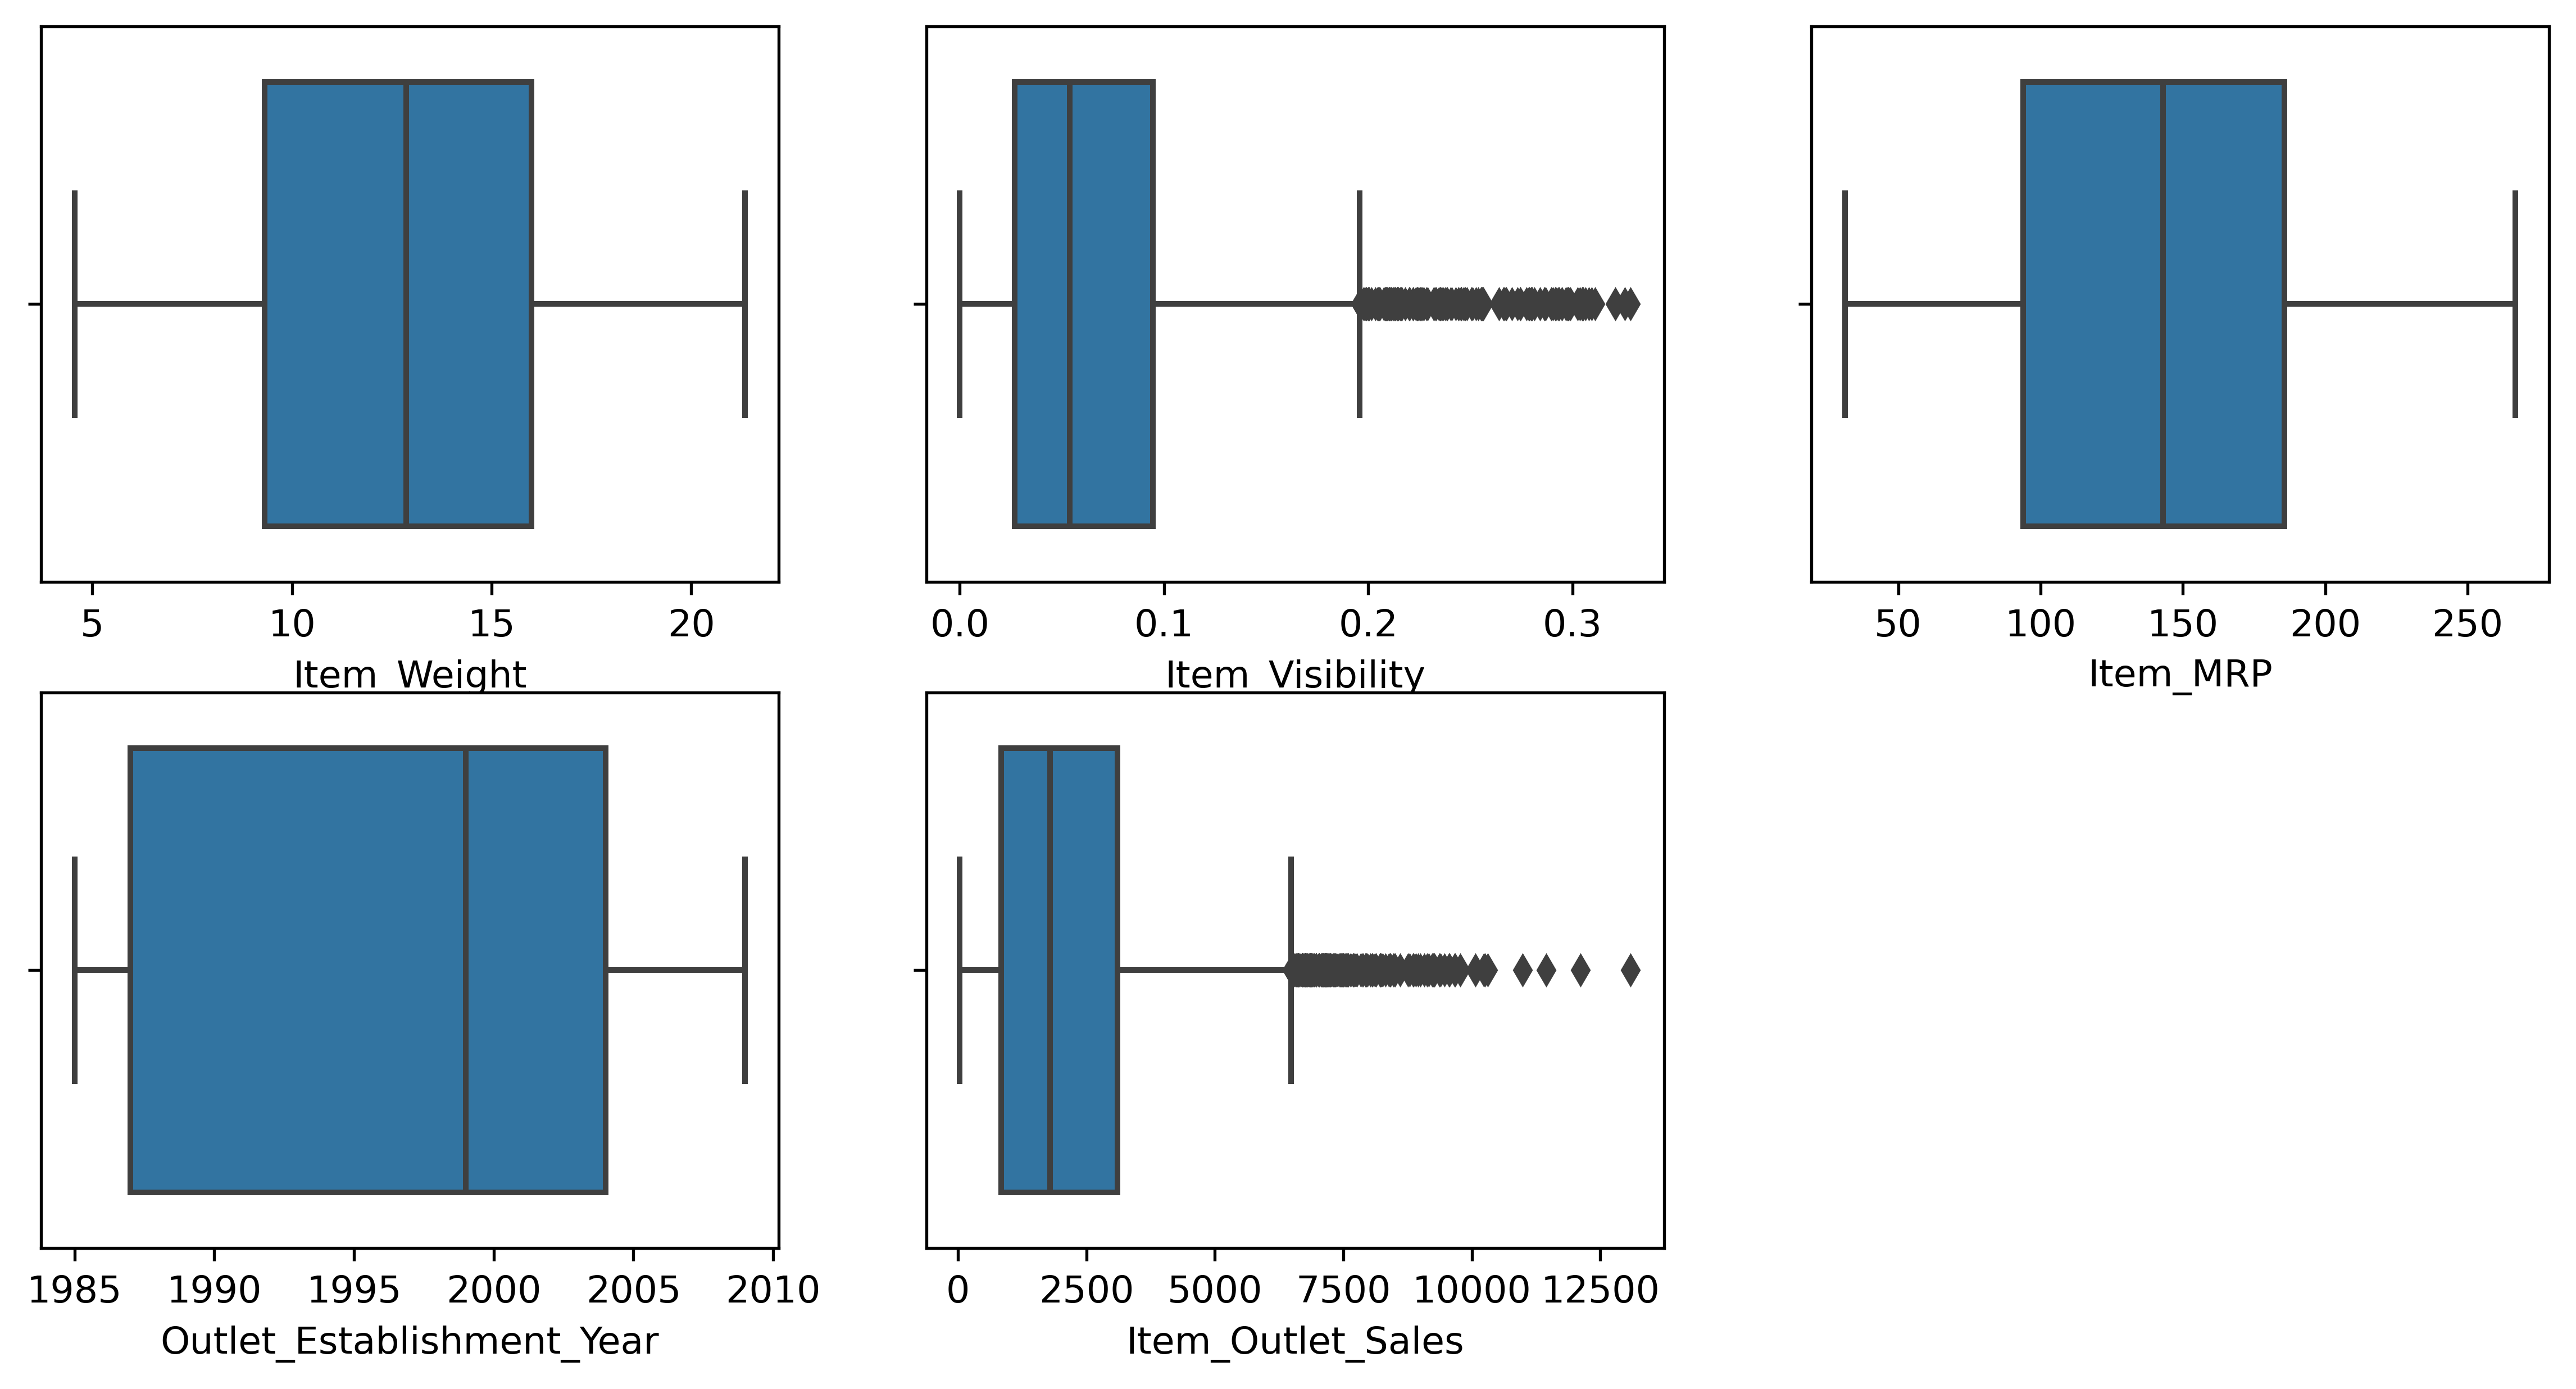

In [9]:
# detecting for outliers
plt.figure(figsize = (12, 6), dpi = 480)

plt.subplot(2,3,1)
sns.boxplot(dataset['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(dataset['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(dataset['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(dataset['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(dataset['Item_Outlet_Sales'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

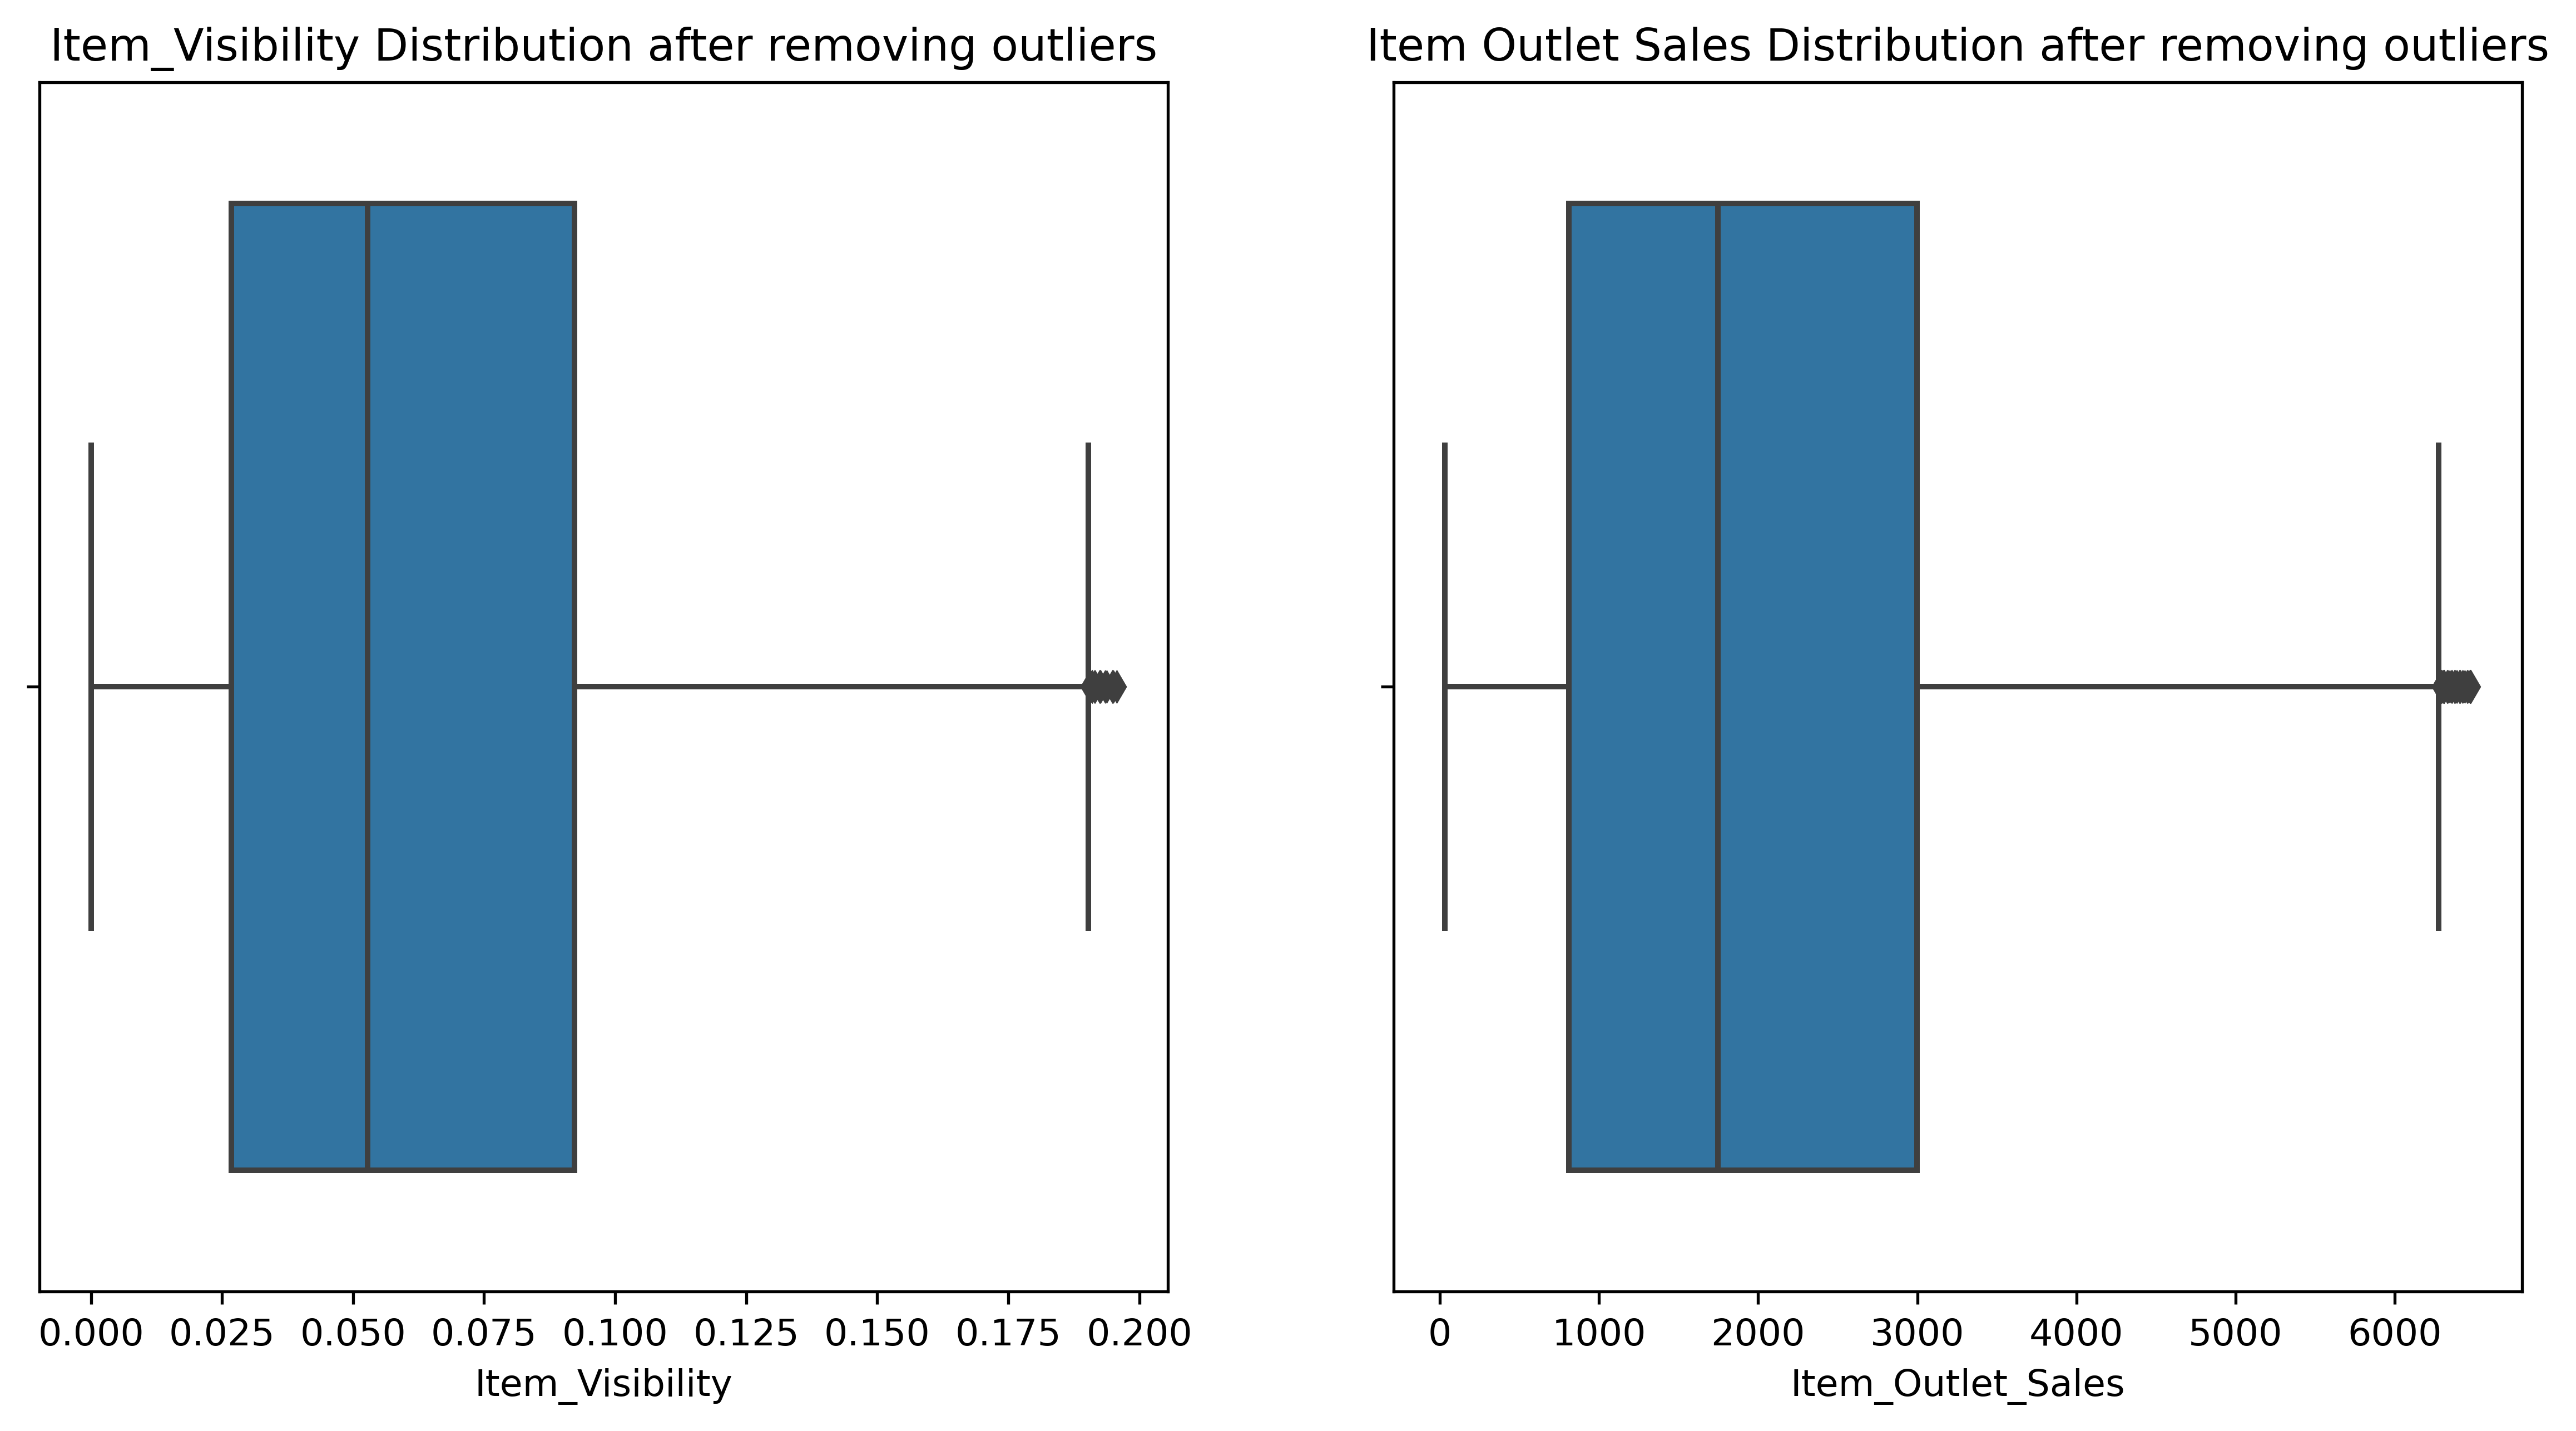

In [10]:
# removing ouliers
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper_v, lower_v = outliers(dataset, "Item_Visibility")
upper_o, lower_o = outliers(dataset, "Item_Outlet_Sales")

dataset_vis = dataset[(dataset['Item_Visibility'] > lower_v) & (dataset['Item_Visibility'] < upper_v)]
dataset_sal = dataset[(dataset['Item_Outlet_Sales'] > lower_o) & (dataset['Item_Outlet_Sales'] < upper_o)]

plt.figure(figsize = (12, 6), dpi = 480)

plt.subplot(1,2,1)
sns.boxplot(dataset_vis['Item_Visibility'])
plt.title('Item_Visibility Distribution after removing outliers')

plt.subplot(1,2,2)
sns.boxplot(dataset_sal['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

## 3-1 Encoging categorical data

In [11]:
data = pd.get_dummies(dataset, columns = ['Item_Type'])

data.shape

(8523, 25)

In [13]:
le = LabelEncoder()

cat_col = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in cat_col:
    data[col] = le.fit_transform(dataset[col])

data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1999,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

## 4-1 Normalizing

In [16]:
# Data inputs
X = data.drop(['Item_Outlet_Sales'], axis = 1)
copy_x = X

# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.columns = copy_x.columns

# Data outputs
y = data['Item_Outlet_Sales']

X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.841872,-0.738147,-0.970732,1.747454,0.139541,-0.284581,-1.369334,-0.252658,-0.286855,-0.174193,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
1,-1.641706,1.354743,-0.908111,-1.489023,1.334103,-0.284581,1.091569,1.002972,-0.286855,-0.174193,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935
2,1.098554,-0.738147,-0.956917,0.010040,0.139541,-0.284581,-1.369334,-0.252658,-0.286855,-0.174193,...,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
3,1.500838,1.354743,-1.281758,0.660050,0.020085,-0.284581,1.091569,-1.508289,-0.286855,-0.174193,...,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
4,-0.929428,-0.738147,-1.281758,-1.399220,-1.293934,-1.950437,1.091569,-0.252658,-0.286855,-0.174193,...,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935


# 2. Feature Selection

## 1-2 Correlation Analysis

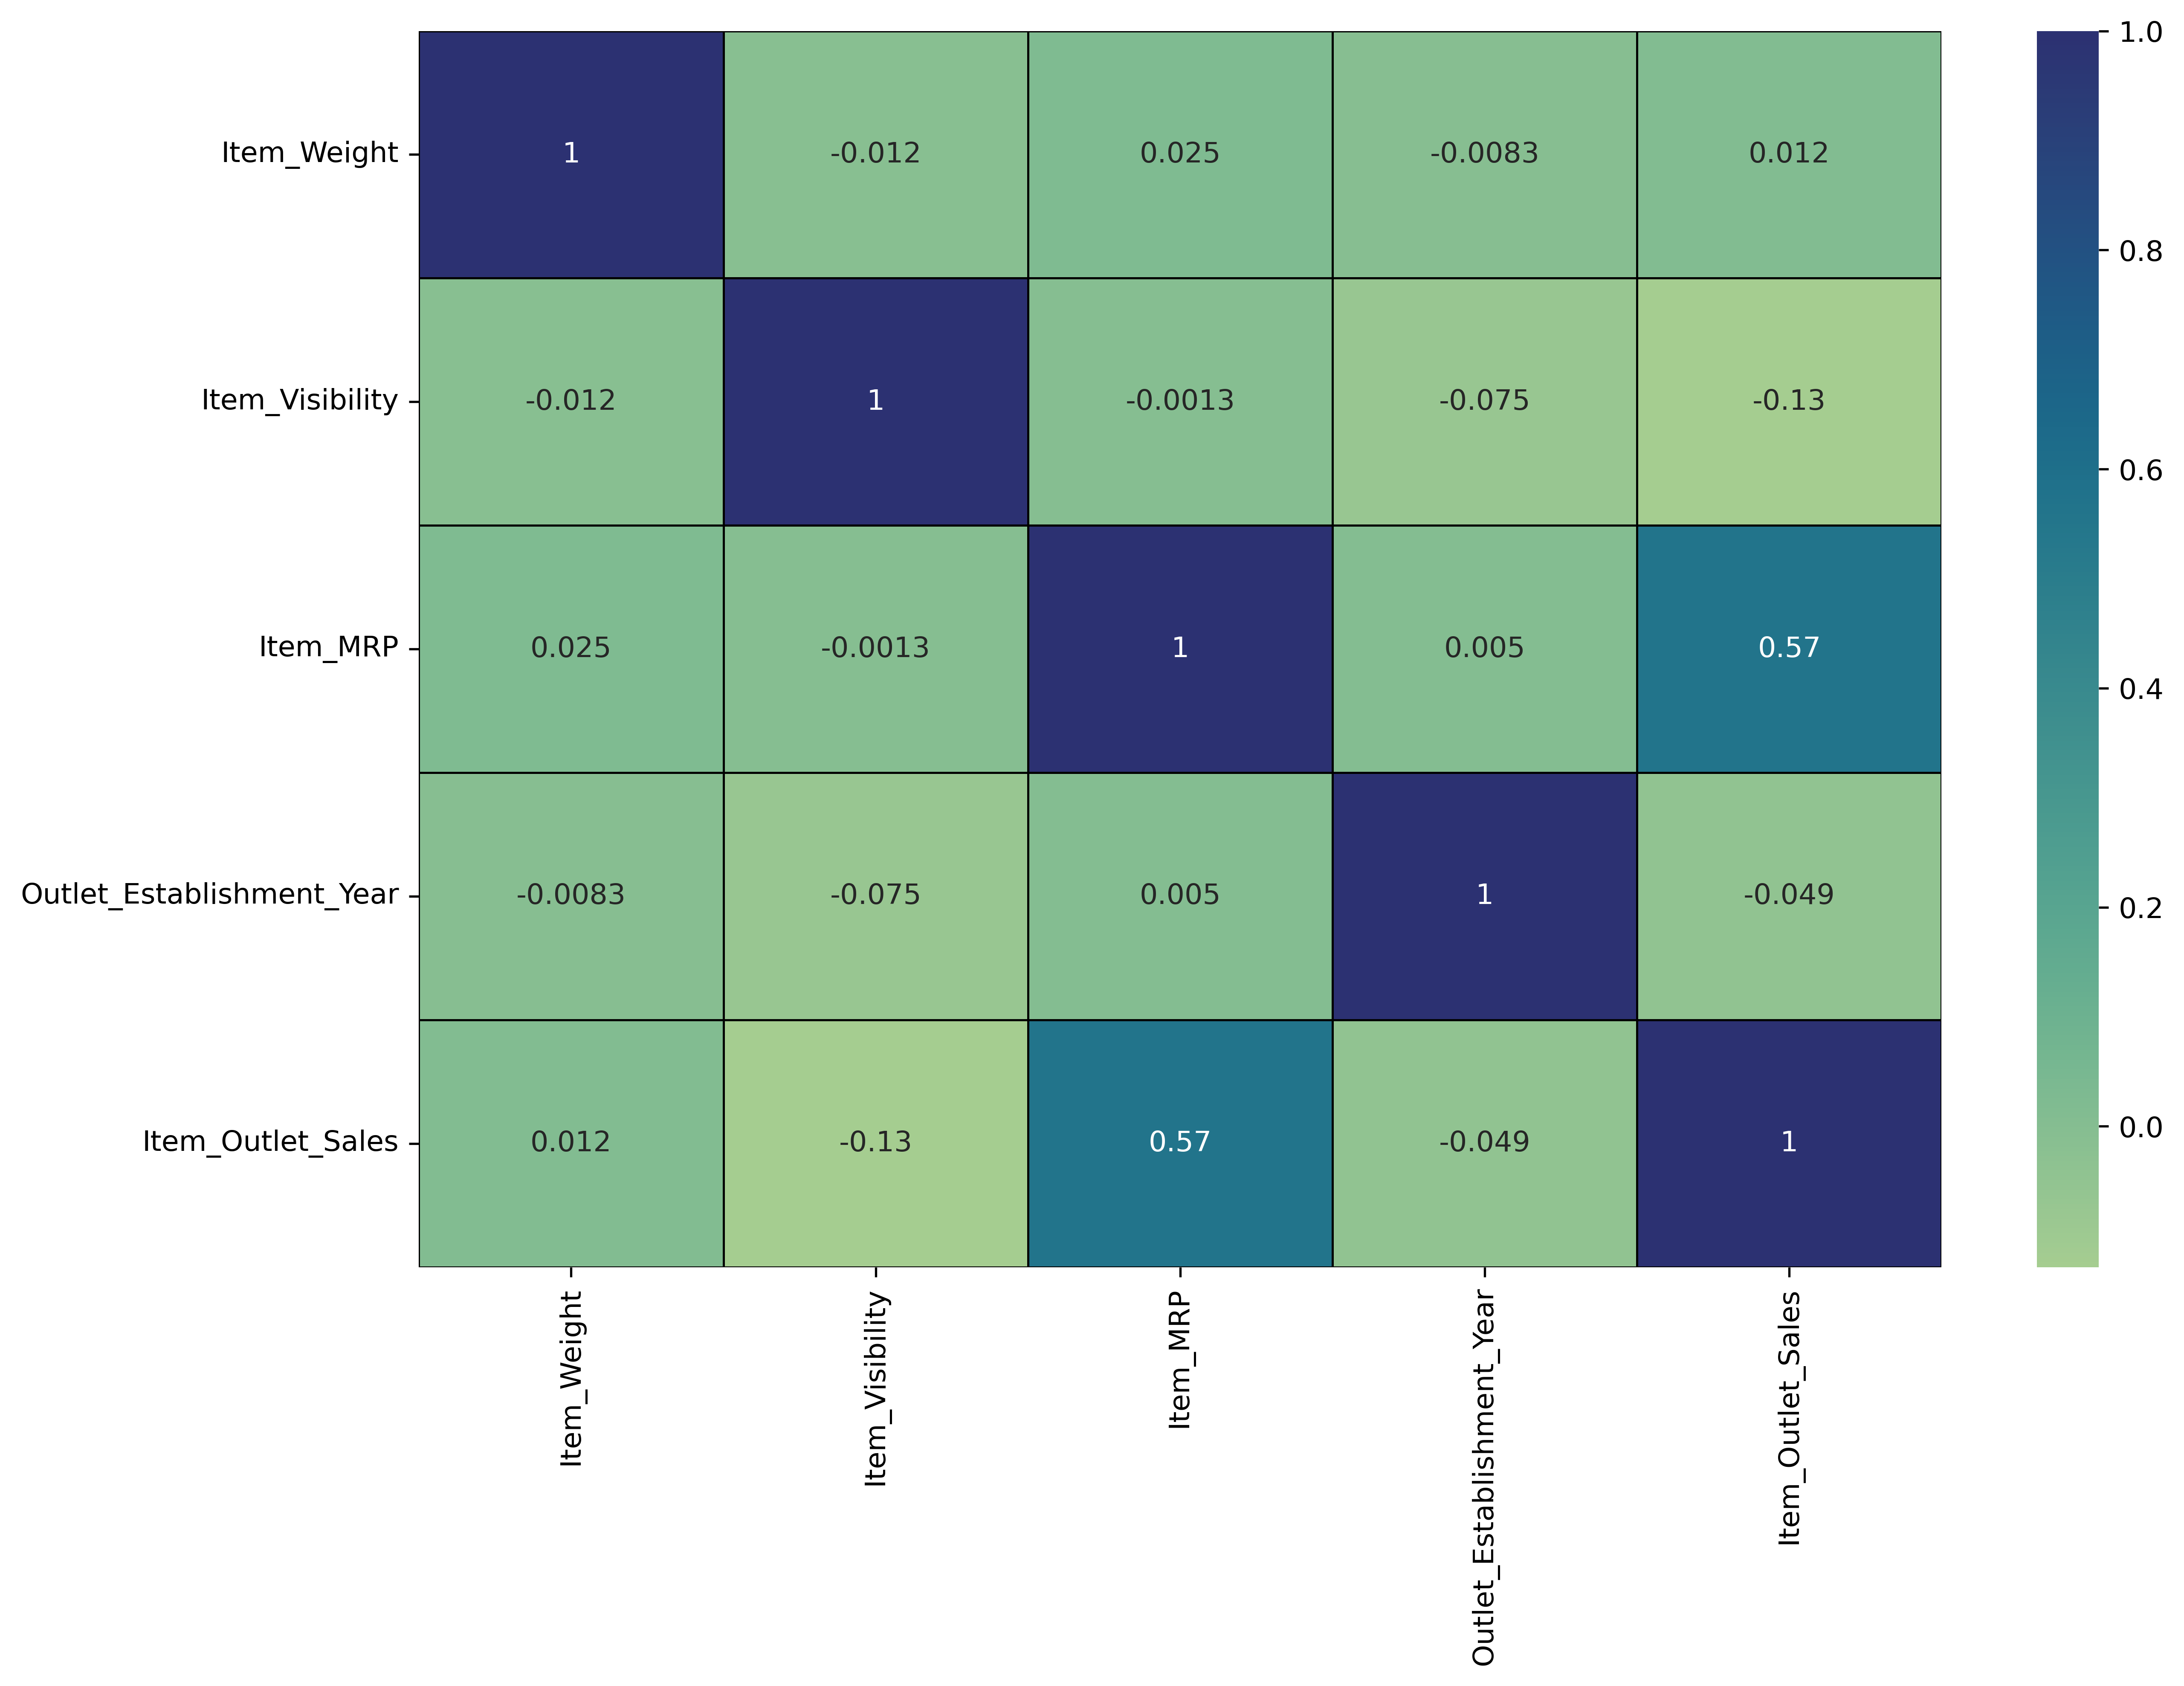

In [17]:
plt.figure(figsize = (12, 8), dpi = 480)
sns.heatmap(dataset.corr(), annot = True, cmap = "crest", linewidths = 0.5, linecolor = 'black')
plt.show()

## 2-2 Features Importance

 1) Item_Weight                    971.272054
 2) Item_Fat_Content               794.560713
 3) Item_Visibility                21.517866
 4) Item_MRP                       14.761258
 5) Outlet_Establishment_Year      13.269729
 6) Outlet_Size                    10.370466
 7) Outlet_Location_Type           10.151891
 8) Outlet_Type                    9.521338
 9) Item_Type_Baking Goods         2.632278
10) Item_Type_Breads               2.535088
11) Item_Type_Breakfast            1.555787
12) Item_Type_Canned               -0.725225
13) Item_Type_Dairy                -0.909922
14) Item_Type_Frozen Foods         -1.435973
15) Item_Type_Fruits and Vegetables -3.344313
16) Item_Type_Hard Drinks          -4.319881
17) Item_Type_Health and Hygiene   -4.582986
18) Item_Type_Household            -5.690473
19) Item_Type_Meat                 -9.295517
20) Item_Type_Others               -9.687537
21) Item_Type_Seafood              -9.807383
22) Item_Type_Snack Foods          -77.516718
23) Item_T

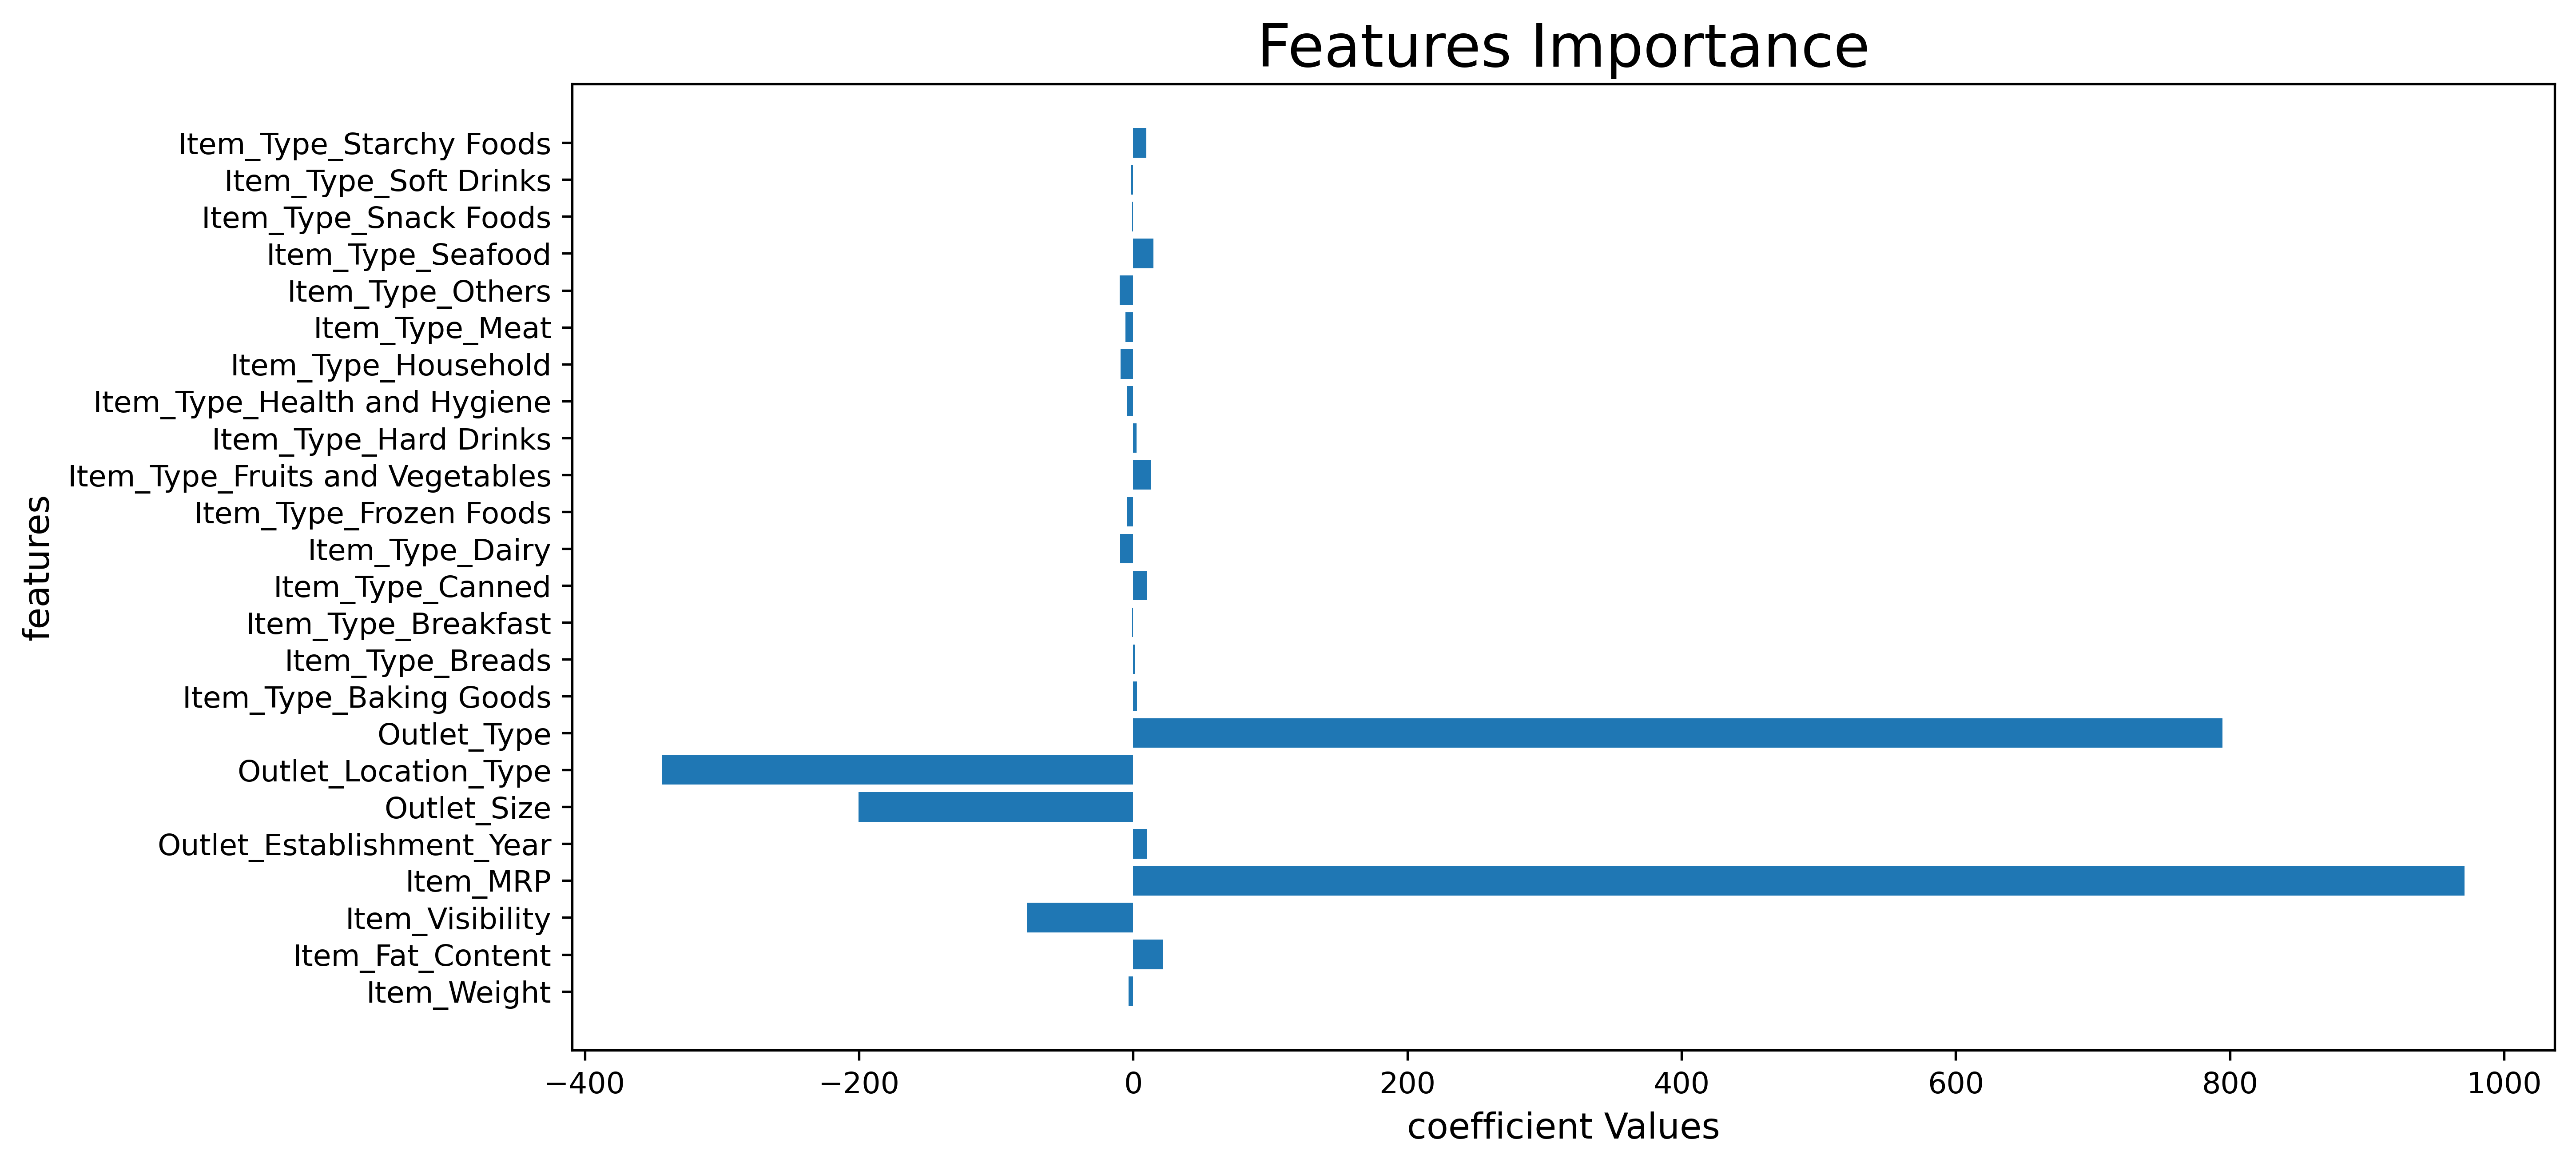

In [30]:
# create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# access feature importance insights(coefficients)
features_label = X.columns
importances = pd.Series(model.coef_, index = X.columns)
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))
    
# visualize feature importance (optional)
plt.figure(figsize = (12, 6), dpi = 480)
plt.barh(importances.index, importances.values)
plt.xlabel('coefficient Values', fontsize = 12)
plt.ylabel('features', fontsize = 12)
plt.title('Features Importance', fontsize = 20)
plt.show()